Project

Part A: IMDb Movie Review Sentiment Analysis

In [ ]:
# Data Exploration and Preprocessing

In [ ]:
import pandas as pd

# Step 1: Upload the file
from google.colab import files
uploaded = files.upload()

# Step 2: Read the uploaded Excel file
# Replace 'Imdb.xlsx' with your actual file name if it's different
df = pd.read_excel('Imdb.xlsx')

# Step 3: Display the first few rows
df.head()


Saving Imdb.xlsx to Imdb.xlsx


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
#Check Basic Info and Missing Values
# Get dataset structure and data types
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,0
review,0
sentiment,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


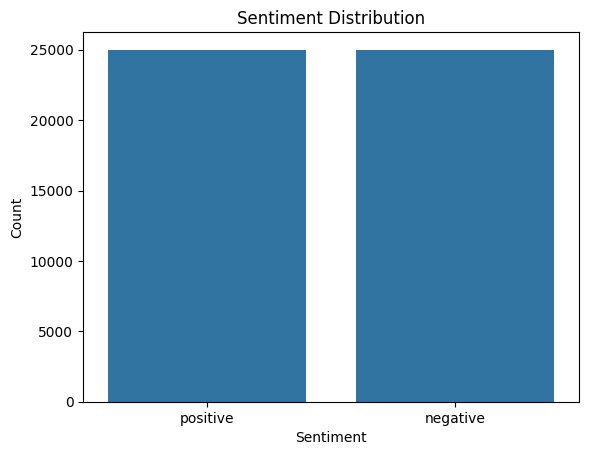

,proportion
sentiment,
positive,50.0
negative,50.0


In [ ]:
# Check Class Distribution
# Count plot for sentiment labels
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Display value counts
df['sentiment'].value_counts(normalize=True) * 100


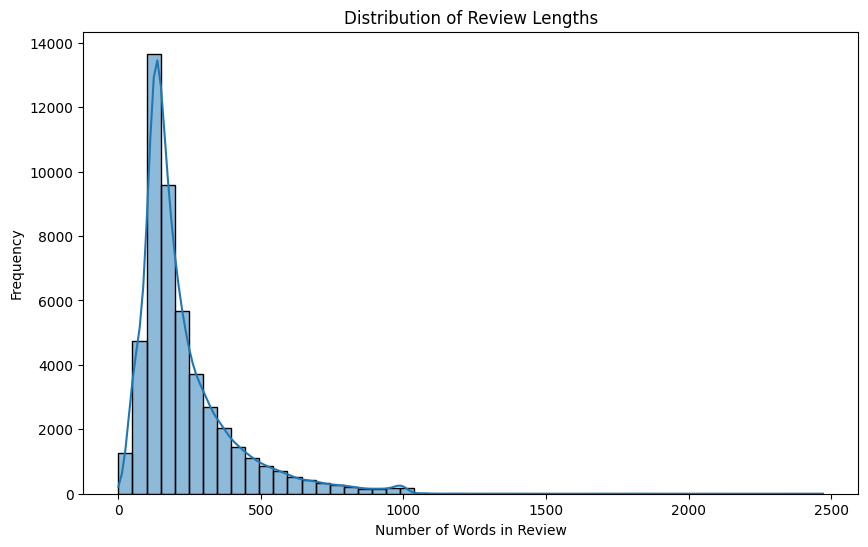

,review_length
count,50000.000000
mean,231.137900
std,171.339334
min,1.000000
25%,126.000000
50%,173.000000
75%,280.000000
max,2470.000000


In [ ]:
# Add a column for review length
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Plot distribution of review lengths
plt.figure(figsize=(10,6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words in Review")
plt.ylabel("Frequency")
plt.show()

# Describe review lengths
df['review_length'].describe()


In [ ]:
# Perform data cleaning and text preprocessing

In [ ]:
# Define Preprocessing Function

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

print("Sample stopwords:", list(stop_words)[:10])


Sample stopwords: ["couldn't", 'because', 'a', 'above', 'hasn', 'do', 'these', 'all', 'was', 'them']


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # remove punctuation
    tokens = text.split()  # basic tokenization instead of word_tokenize
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    tokens = [lemmatizer.lemmatize(stemmer.stem(word)) for word in tokens]  # stem + lemmatize
    return " ".join(tokens)


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df['cleaned_review'] = df['review'].apply(preprocess_text)
df[['review', 'cleaned_review']].head()


,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one review mention watch 1 oz episod youll hoo...
1,A wonderful little production. <br /><br />The...,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visual stun film...


In [ ]:
# Convert Text to Numbers (TF-IDF Vectorization)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review'])


In [ ]:
# Convert sentiment labels to binary:
# 1 for positive, 0 for negative
y = df['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
# Word Count
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))

# Character Count
df['char_count'] = df['review'].apply(lambda x: len(str(x)))

# Average Word Length
df['avg_word_len'] = df['char_count'] / df['word_count']

In [ ]:
# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Use only TF-IDF features
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Train the Model (Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Evaluate the Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on test set
y_pred = model.predict(X_test)

# Print performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.885
Precision: 0.8748795064584538
Recall: 0.9005755110140901
F1 Score: 0.8875415607275572

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.89      0.88     10000



In [ ]:
# Confusion Matrix

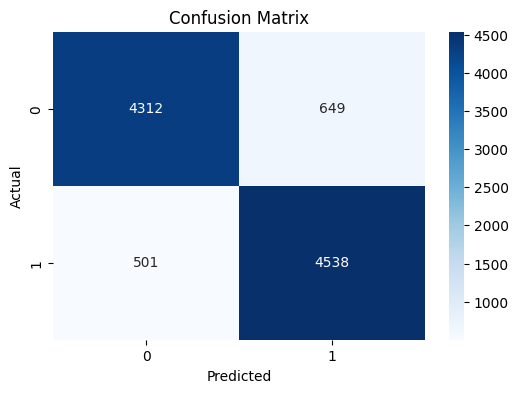

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

In [ ]:
#SVM (Linear)

In [ ]:
svm = LinearSVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


In [ ]:
# Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [ ]:
# Evaluate All Models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(name, y_test, y_pred):
    print(f"--- {name.upper()} ---")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print()


In [ ]:
evaluate_model("naive_bayes", y_test, nb_pred)
evaluate_model("SVM", y_test, svm_pred)
evaluate_model("Random Forest", y_test, rf_pred)

--- NAIVE_BAYES ---
Accuracy : 0.8483
Precision: 0.8442142298670836
Recall   : 0.8571145068465965
F1 Score : 0.8506154603643525

--- SVM ---
Accuracy : 0.8805
Precision: 0.8727695888285493
Recall   : 0.8930343322087716
F1 Score : 0.8827856792545365

--- RANDOM FOREST ---
Accuracy : 0.8458
Precision: 0.8548812664907651
Recall   : 0.8358801349474102
F1 Score : 0.8452739313666466



In [ ]:
# get sentiment

In [ ]:
def predict_sentiment(review):
    cleaned = preprocess_text(review)
    vector = tfidf.transform([cleaned])
    prediction = model.predict(vector)[0]
    return "positive" if prediction == 1 else "negative"

In [ ]:
review = input("Enter a movie review: ")
result = predict_sentiment(review)
print("Predicted Sentiment:", result)

Enter a movie review: it was good movie\
Predicted Sentiment: positive


video explanation

In [1]:
https://drive.google.com/file/d/1YqKniEj5JvG8lUXsav7OwjVkbVpqhPdq/view?usp=drive_link

SyntaxError: invalid decimal literal (ipython-input-1-49035049.py, line 1)